In [0]:
from fastai import *
from fastai.text import *

In [4]:
df_train = pd.read_csv('base_treino.csv',sep='|',encoding='utf-8')
df_train.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula2179,Este pomada é indicada para o alívio das manif...,This ointment is indicated for the relief of i...,D,D07,D07B,D07B1
1,bula96,Replenine-VF é indicado no tratamento de episó...,Replenine-VF is indicated for the treatment of...,B,B02,B02D,B02D2
2,bula1835,Hipertensão captopril é indicado para o tratam...,Hypertension Captopril is indicated for the tr...,C,C09,C09A,C09A0
3,bula1590,Transpulmin xarope é um expectorante destinado...,Transpulmin syrup is an expectorant intended f...,R,R05,R05C,R05C0
4,bula4244,Dutasterida trata e previne a progressão da hi...,Dutasterida treats and prevents the progressio...,G,G04,G04C,G04C3


In [5]:
df_valid= pd.read_csv('base_teste.csv',sep='|',encoding='utf-8')
df_valid.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula292,Cloridrato de ranitidina é indicado no tratame...,Hydrochloride Ranitidina is indicated for the ...,A,A02,A02B,A02B1
1,bula7742,"Hipercolesterolemia Primária ezetimiba, admini...","Primary Hypercholesterolaemia ezetimibe, admin...",C,C10,C10A,C10A9
2,bula2854,SURVANTAr beractanto é destinado à prevenção e...,SURVANTAr Beractant is intended for the preven...,R,R07,R07C,R07C0
3,bula2326,GASTROBENE está indicado para - distúrbios da ...,GASTROBENE is indicated for-disorders of gastr...,A,A03,A03F,A03F0
4,bula3390,Hidrofluxr é destinado ao tratamento da hipert...,HYDROFLUXR is intended for the treatment of ar...,C,C03,C03A,C03A3


In [0]:
data_lm = TextLMDataBunch.from_df('.',train_df=df_train,valid_df=df_valid,text_cols='indicacao',label_cols='ATC_1')

In [7]:
data_lm.show_batch()

idx,text
0,"esfoliativa , dermatite solar , dermatite de estase e prurido anogenital . xxbos xxmaj xxunk - xxup xxunk é indicado no tratamento de episódios hemorrágicos e na manutenção de níveis plasmáticos de fator xxup ix , em pacientes xxunk com hemofilia xxup b. xxbos xxmaj hipertensão captopril é indicado para o tratamento da hipertensão , por reduzir a pressão arterial nesses casos . xxmaj insuficiência xxmaj cardíaca captopril é indicado"
1,"xxmaj diagnóstica da xxmaj hiperfunção xxmaj adrenocortical . xxbos xxmaj este medicamento é indicado como analgésico e antitérmico . xxbos xxmaj este medicamento é destinado ao tratamento de giardíase amebíase intestinal sob todas as formas amebíase hepática tricomoníase . xxbos xxmaj canestenr creme é indicado para o tratamento de dermatomicoses causadas por dermatófitos , leveduras , bolores , etc . por ex . xxmaj tinea pedis , xxmaj tinea manuum"
2,"trato respiratório inferior . xxbos a vacina febre amarela atenuada é utilizada na prevenção da febre amarela , doença causada por um xxunk da xxunk xxmaj xxunk , do gênero xxmaj xxunk . é recomendada para vacinação em áreas endêmicas ou xxunk ou para os viajantes que a elas se destinam . xxbos xxmaj xxunk está indicado para tratamento local de infecções micóticas vulvovaginais causadas por xxmaj candida albicans ."
3,coroidite e uveíte posterior difusa oftalmia simpática conjuntivite alérgica ceratite coriorretinite neurite óptica irites e iridociclites . - xxmaj doenças xxmaj respiratórias xxmaj sarcoidose sintomática xxmaj síndrome de xxmaj lefler não - tratável por outros meios beriliose tuberculose pulmonar fulminante ou disseminada quando usado concomitantemente à quimioterapia antituberculose apropriada pneumonite por aspiração asma brônquica . - xxmaj distúrbios xxmaj hematológicos xxmaj púrpura trombocitopênica idiopática em adultos trombocitopenia secundária em adultos
4,", acne pustulosa , impetigo , neurodermatite , estomatite angular , dermatite por fotossensibilidade , dermatofitose inguinal liquenificada e infecções fúngicas por tinea , como xxmaj tinea pedis , xxmaj tinea cruris e xxmaj tinea corporis . xxbos xxmaj xxunk creme deve ser usado para o tratamento dos seguintes tipos de micose xxmaj tinha dos pés plantar e interdigital xxmaj tinha crural xxmaj outras dermatofitoses tinha do corpo e tinha"


In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, callback_fns=ShowGraph,pretrained=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


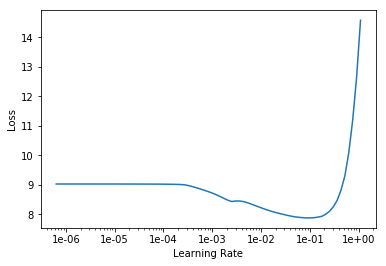

In [9]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,6.312360,5.876452,0.124000,00:47
1,5.280618,4.533466,0.250089,00:47
2,3.861930,3.018378,0.453750,00:48
3,2.448655,1.907683,0.643884,00:48
4,1.725098,1.536062,0.706259,00:47
5,1.399772,1.399419,0.728196,00:47
6,1.281849,1.363870,0.731250,00:48
7,1.331818,1.450900,0.709063,00:47
8,1.608358,1.884497,0.605607,00:47
9,4.026597,4.584139,0.228687,00:47


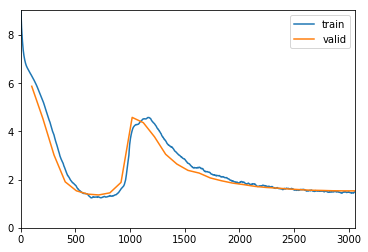

Better model found at epoch 0 with accuracy value: 0.12399999797344208.
Better model found at epoch 1 with accuracy value: 0.25008928775787354.
Better model found at epoch 2 with accuracy value: 0.45374995470046997.
Better model found at epoch 3 with accuracy value: 0.6438838839530945.
Better model found at epoch 4 with accuracy value: 0.7062589526176453.
Better model found at epoch 5 with accuracy value: 0.728196382522583.
Better model found at epoch 6 with accuracy value: 0.7312499284744263.


In [10]:
max_lr = 1e-2
learn_lm.fit_one_cycle(30, max_lr=max_lr, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm')])

In [0]:
#Carrego a melhor versão do language model
learn_lm.load('learn_lm')
learn_lm.save_encoder('enc')

In [0]:
data_clas = TextClasDataBunch.from_df('.',train_df=df_train,valid_df=df_valid,text_cols='indicacao',label_cols='ATC_1',vocab=data_lm.vocab)
data_clas.save('data_clas')

In [13]:
data_clas.show_batch()

text,target
"xxbos a simeticona é indicada para o alívio dos sintomas no caso de excesso de gases no aparelho gastrintestinal constituindo motivo de dores ou cólicas intestinais1 , tais como - xxmaj meteorismo1 - xxmaj eructação1 - xxmaj borborigmos1 - xxmaj aerofagia pós - cirúrgica1 - xxmaj distensão abdominal1 - xxmaj flatulência1 xxmaj sabendo que os gases no trato digestivo atrapalham os exames abdominais de imagem e a simeticona facilita a",A
"xxbos xxup decadron injetável é destinado ao tratamento de condições nas quais os efeitos antiinflamatórios e imunossupressores dos corticosteroides são desejados , especialmente para tratamento intensivo durante períodos mais curtos . xxmaj indicações específicas xxup a. xxmaj por injeção intravenosa ou intramuscular , quando não seja viável a terapia oral xxmaj insuficiência adrenocortical primária xxup decadron injetável possui atividade predominantemente glicocorticoide , com baixa atividade mineralocorticoide . xxmaj por isso",H
xxbos pneumovaxtm 23 é indicada para vacinação contra doença pneumocócica causada pelos tipos de pneumococos incluídos na vacina . a eficácia da vacina na prevenção de pneumonia pneumocócica e bacteremia pneumocócica foi demonstrada em estudos clínicos controlados na xxmaj xxunk do xxmaj sul e na xxmaj xxunk e em estudos de caso - controle . pneumovaxtm 23 não previne contra doenças causadas por tipos xxunk de pneumococos diferentes dos xxunk,J
"xxbos xxmaj neo xxmaj gentamicin xxmaj solução xxmaj injetável é indicado para o tratamento de infecções causadas por cepas de bactérias sensíveis dos seguintes microorganismos xxmaj pseudomonas aeruginosa , xxmaj proteus sp . indol - positivo e indol - negativo , xxmaj escherichia coli , xxmaj klebsiella - xxmaj enterobacter - xxmaj serratia sp . , xxmaj citrobacter sp . , xxmaj providencia sp . , xxmaj staphylococcus sp .",J
"xxbos xxmaj gentamicin sulfato de gentamicina é indicado para o tratamento de infecções causadas por cepas de bactérias sensíveis dos seguintes micro - organismos xxmaj pseudomonas aeruginosa , xxmaj proteus sp . indol - positivo e indol - negativo , xxmaj escherichia coli , xxmaj klebsiella - xxmaj enterobacter - xxmaj serratia sp . , xxmaj citrobacter sp . , xxmaj providencia sp . , xxmaj staphylococcus sp . coagulase",J


In [0]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, callback_fns=ShowGraph, pretrained=False)
learn_clas.load_encoder('enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


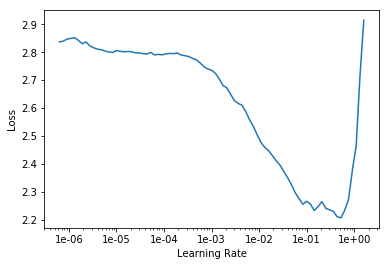

In [16]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.595759,0.958403,0.755592,00:23
1,1.126977,0.667187,0.820215,00:27
2,0.842881,0.562429,0.840928,00:26
3,0.723271,0.549072,0.848384,00:25
4,0.648580,0.574271,0.833471,00:23
5,0.643858,0.540083,0.849213,00:25
6,0.579548,0.521837,0.874068,00:23
7,0.615863,0.662264,0.816901,00:25
8,0.599657,0.620500,0.829329,00:23
9,0.605522,0.662749,0.830157,00:26


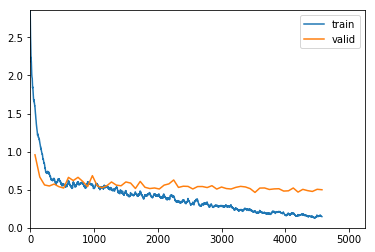

Better model found at epoch 0 with accuracy value: 0.755592405796051.
Better model found at epoch 1 with accuracy value: 0.8202154040336609.
Better model found at epoch 2 with accuracy value: 0.8409278988838196.
Better model found at epoch 3 with accuracy value: 0.848384439945221.
Better model found at epoch 5 with accuracy value: 0.8492129445075989.
Better model found at epoch 6 with accuracy value: 0.8740679621696472.
Better model found at epoch 24 with accuracy value: 0.8765534162521362.
Better model found at epoch 26 with accuracy value: 0.8773819208145142.
Better model found at epoch 30 with accuracy value: 0.8823529481887817.
Better model found at epoch 34 with accuracy value: 0.8848384618759155.
Better model found at epoch 35 with accuracy value: 0.8889809250831604.
Better model found at epoch 38 with accuracy value: 0.8922949433326721.
Better model found at epoch 39 with accuracy value: 0.8956089615821838.
Better model found at epoch 49 with accuracy value: 0.8980944752693176.


In [0]:
max_lr = 3e-2
learn_clas.fit_one_cycle(70, max_lr=max_lr , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

In [0]:
learn_clas.load('learn_clas9386')

In [0]:
interp = ClassificationInterpretation.from_learner(learn_clas)

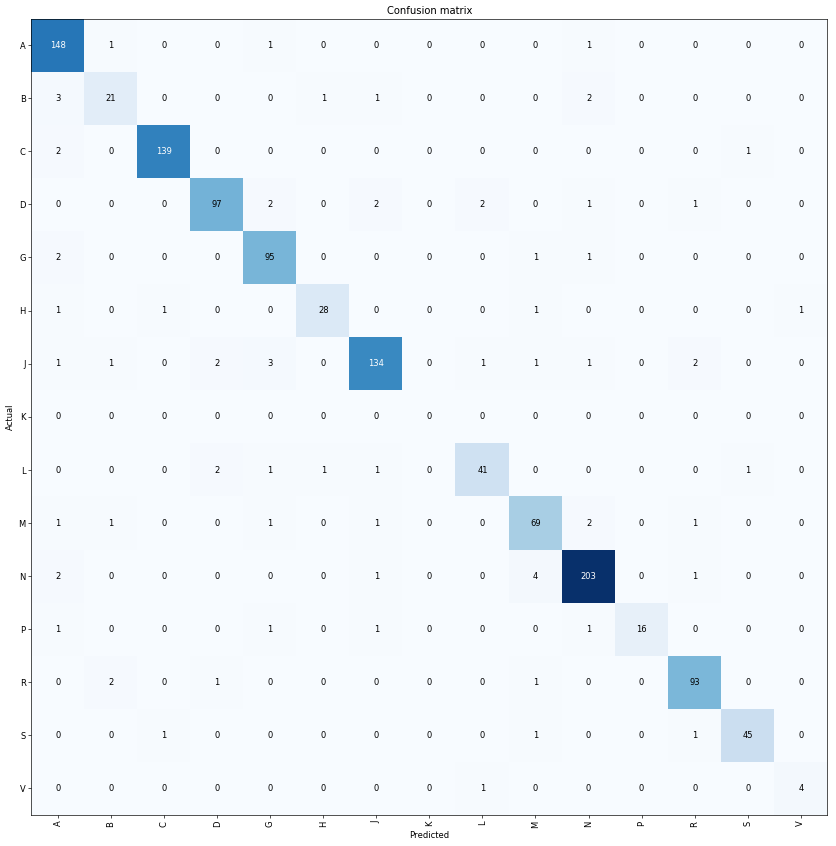

In [0]:
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)